In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
pd.pandas.set_option("display.max_columns", None)
# Create Dataframe
df = pd.read_csv("data/healthcare-dataset-stroke-data.csv")
# Print shape of dataset
print(df.shape)

(5110, 12)


In [2]:
##these are the features with nan value
features_with_na=[features for features in df.columns if df[features].isnull().sum()>=1]
for feature in features_with_na:
    print(feature,np.round(df[feature].isnull().mean()*100,5), '% missing values')

bmi 3.93346 % missing values


In [3]:
df.drop(['id', 'gender', 'Residence_type'], inplace=True, axis=1)

In [4]:
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
print('Num of Numerical Features :', len(numeric_features))
numeric_features

Num of Numerical Features : 6


['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi', 'stroke']

In [5]:
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']
print('Num of Categorical Features :', len(categorical_features))
categorical_features

Num of Categorical Features : 3


['ever_married', 'work_type', 'smoking_status']

In [6]:
discrete_features=[feature for feature in numeric_features if (len(df[feature].unique())<=25)]
print('Num of Discrete Features :',len(discrete_features))
discrete_features

Num of Discrete Features : 3


['hypertension', 'heart_disease', 'stroke']

In [7]:
continuous_features=[feature for feature in numeric_features if len(df[feature].unique()) > 25]
print('Num of Continuous Features :',len(continuous_features))
continuous_features

Num of Continuous Features : 3


['age', 'avg_glucose_level', 'bmi']

In [10]:
df1 = df.copy()
for i in continuous_features:
    df1[i].fillna(df1[i].median(), inplace=True)

In [14]:

import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(attributes, df):
    # Initialize an empty list to store the results
    vif_results = []
    
    # Iterate over each attribute
    for i, attribute in enumerate(attributes):
        # Calculate the VIF
        vif = variance_inflation_factor(df[attributes].values, i)
        
        # Store the result in the list
        vif_results.append({'Variable': attribute, 'VIF': vif})
    
    # Convert the list to a DataFrame
    vif_df = pd.DataFrame(vif_results)
    
    return vif_df

# Example usage:
attributes = ['age', 'avg_glucose_level', 'bmi', 'hypertension', 'heart_disease']
vif_df = calculate_vif(attributes, df1)
vif_df

,Variable,VIF
0,age,5.897428
1,avg_glucose_level,6.009802
2,bmi,8.094934
3,hypertension,1.196185
4,heart_disease,1.150569


In [15]:
calculate_vif(numeric_features,df1)

,Variable,VIF
0,age,6.115488
1,hypertension,1.201189
2,heart_disease,1.155440
3,avg_glucose_level,6.030127
4,bmi,8.217755
5,stroke,1.135435


In [18]:
df1.columns

Index(['age', 'hypertension', 'heart_disease', 'ever_married', 'work_type',
       'avg_glucose_level', 'bmi', 'smoking_status', 'stroke'],
      dtype='object')

In [19]:
calculate_vif(continuous_features,df1)

,Variable,VIF
0,age,5.365477
1,avg_glucose_level,5.940517
2,bmi,7.851879


In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def remove_outliers(features, df):
    if isinstance(features, str):
        features = [features]
    
    for feature in features:
        # Calculate the first quartile (Q1)
        Q1 = df[feature].quantile(0.25)
        
        # Calculate the third quartile (Q3)
        Q3 = df[feature].quantile(0.75)
        
        # Calculate the Interquartile Range (IQR)
        IQR = Q3 - Q1
        
        # Define the lower and upper bounds for outliers
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Remove outliers from the feature
        df[feature] = np.where((df[feature] < lower_bound) | (df[feature] > upper_bound), np.nan, df[feature])
        
        # Fill NaN values with the median
        df[feature] = df[feature].fillna(df[feature].median())
        
        # Plot a box plot to show the outlier distribution
        plt.figure(figsize=(8, 6))
        plt.boxplot(df[feature], vert=False)
        plt.title(f'Outlier Distribution for {feature}')
        plt.show()



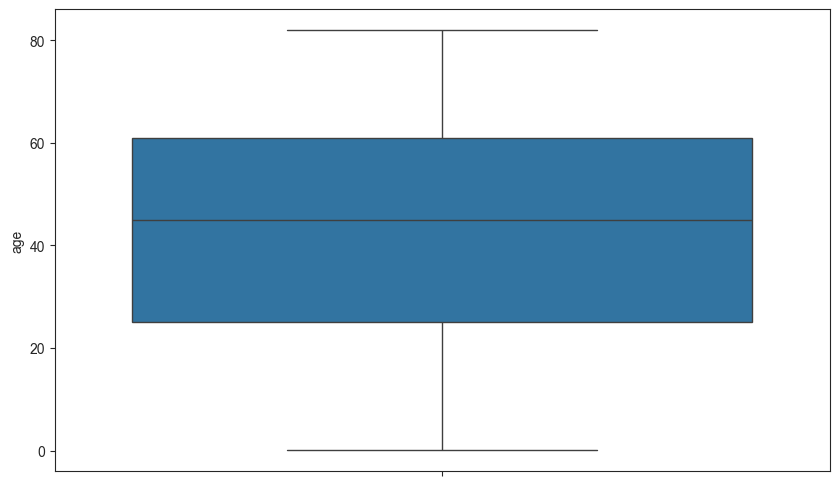

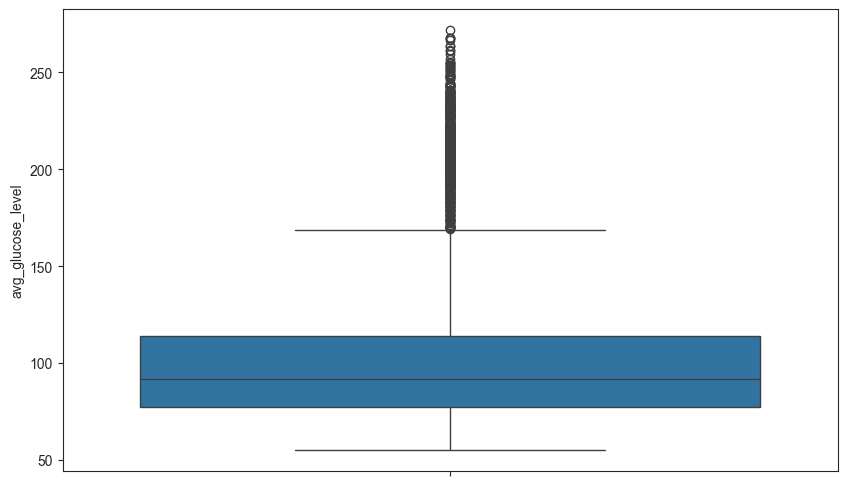

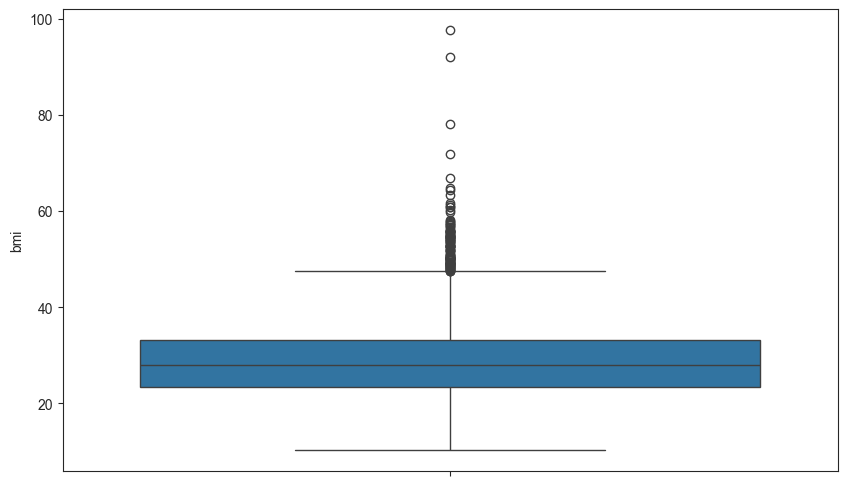

In [22]:
for i in continuous_features:
    plt.figure(figsize=(10,6))
    sns.set_style('ticks')
    ax = sns.boxplot(df[i])

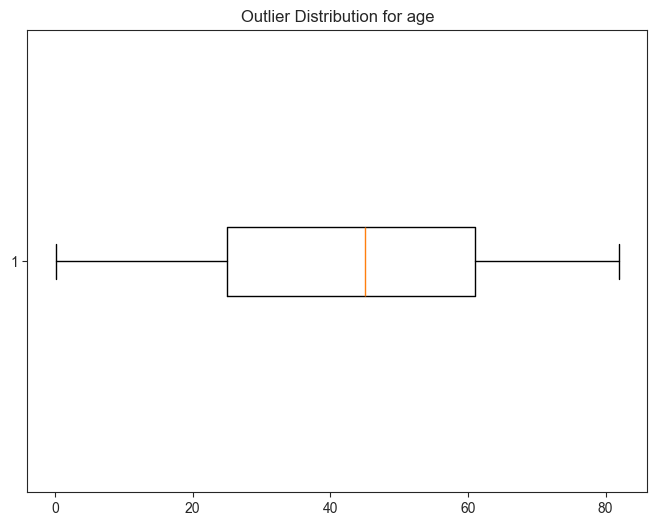

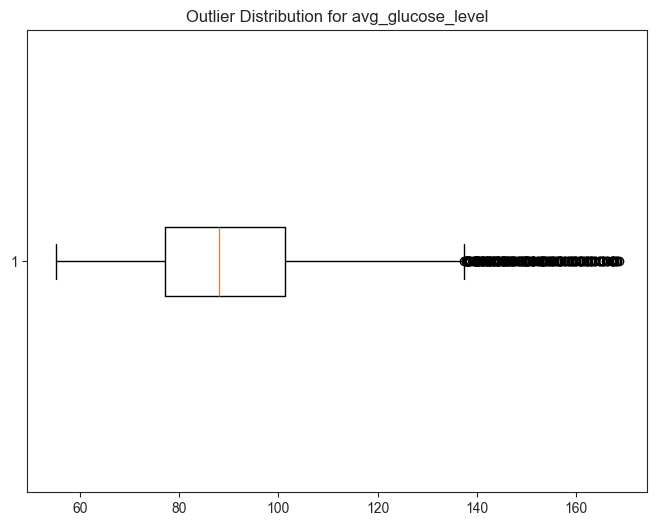

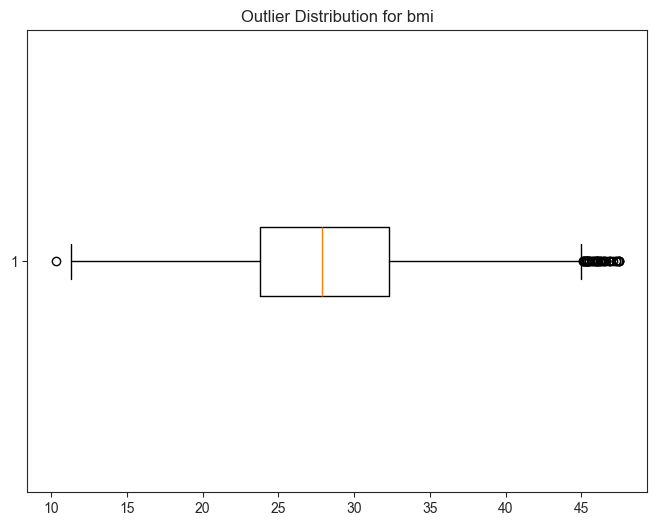

In [23]:
remove_outliers(continuous_features,df)


In [25]:
df.shape

(5110, 9)

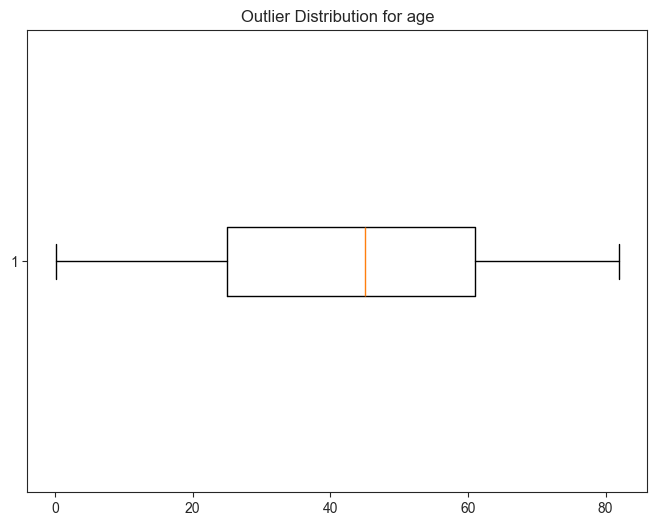

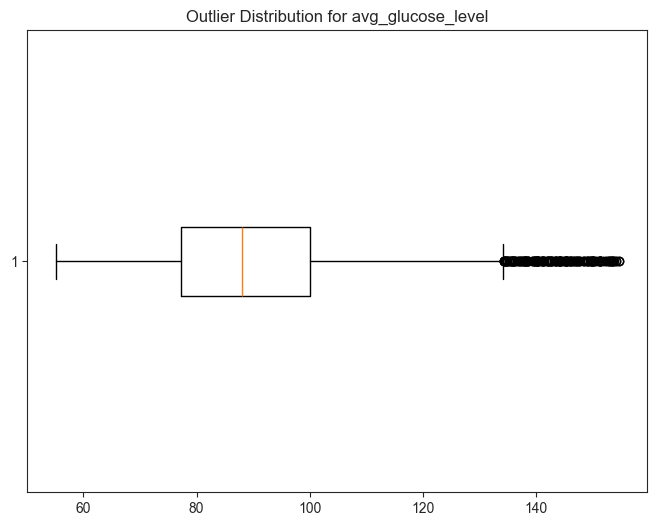

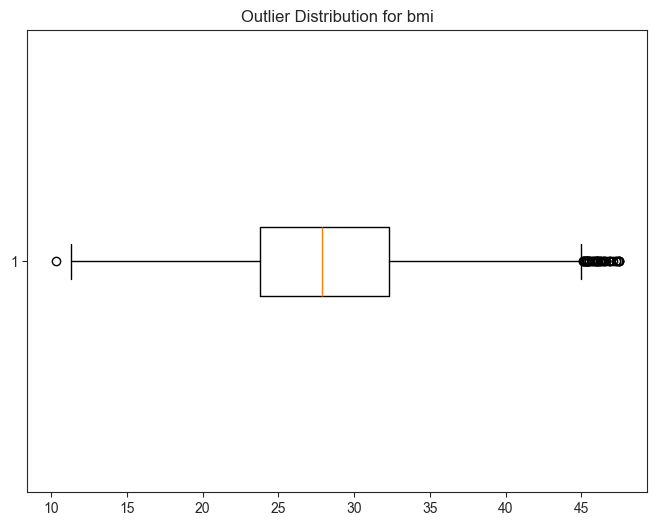

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def remove_outliers(features, df):
    if isinstance(features, str):
        features = [features]
    
    for feature in features:
        # Calculate the Z-scores
        z_scores = np.abs((df[feature] - df[feature].mean()) / df[feature].std())
        
        # Remove outliers (Z-score > 3)
        df[feature] = np.where(z_scores > 3, np.nan, df[feature])
        
        # Fill NaN values with the median
        df[feature] = df[feature].fillna(df[feature].median())
        
        # Plot a box plot to show the outlier distribution
        plt.figure(figsize=(8, 6))
        plt.boxplot(df[feature], vert=False)
        plt.title(f'Outlier Distribution for {feature}')
        plt.show()

remove_outliers(continuous_features, df)  # List of features

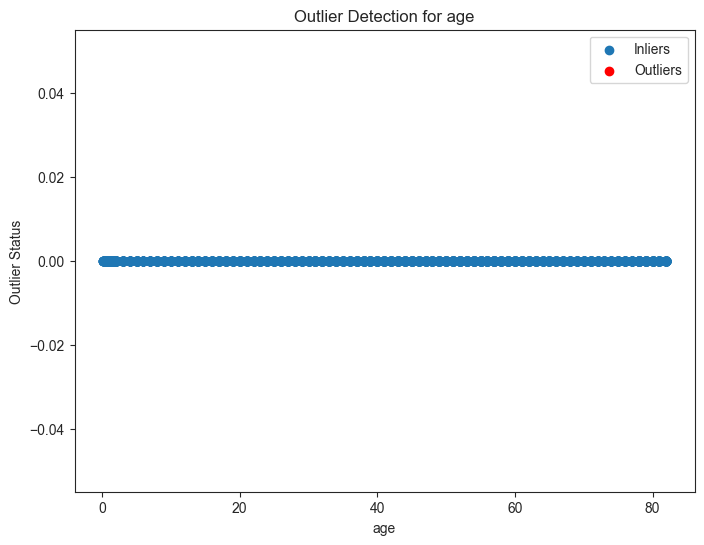

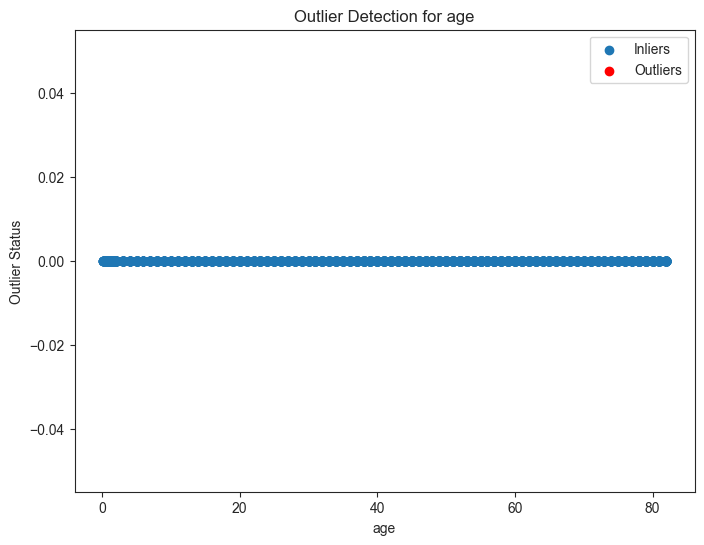

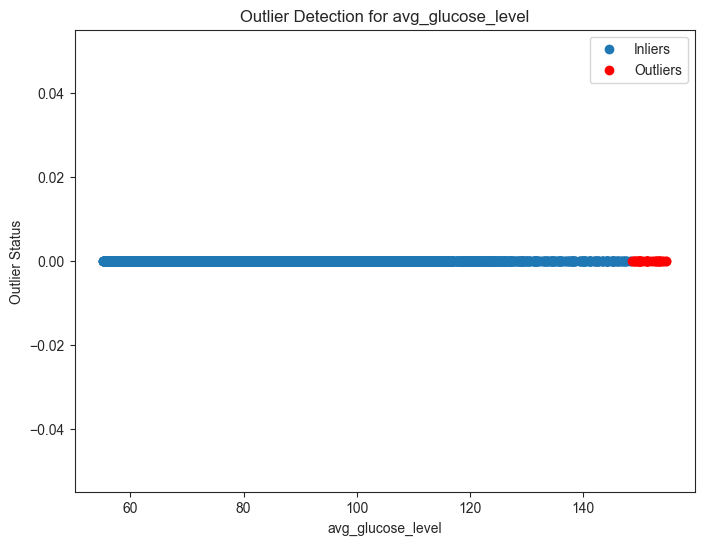

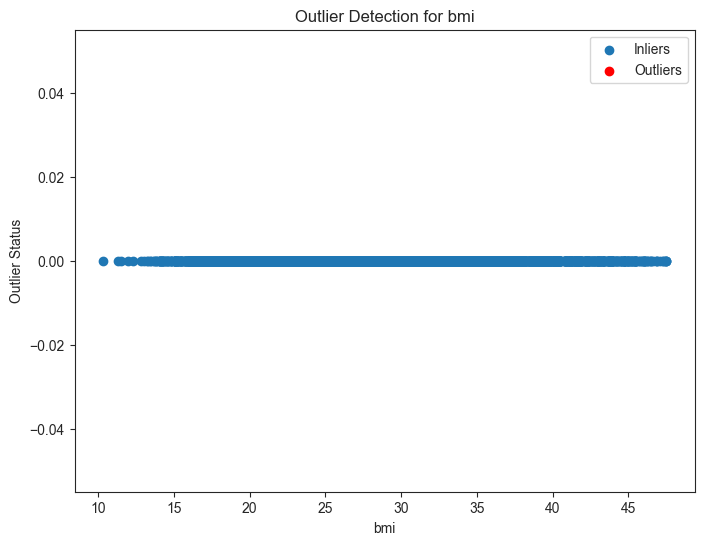

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_outliers(features, df):
    if isinstance(features, str):
        features = [features]
    
    for feature in features:
        # Calculate the Z-scores
        z_scores = np.abs((df[feature] - df[feature].mean()) / df[feature].std())
        
        # Identify outliers (Z-score > 3)
        outliers = z_scores > 3
        
        # Plot the feature with outliers marked
        plt.figure(figsize=(8, 6))
        plt.scatter(df[feature][~outliers], np.zeros_like(df[feature][~outliers]), label='Inliers')
        plt.scatter(df[feature][outliers], np.zeros_like(df[feature][outliers]), label='Outliers', color='red')
        plt.title(f'Outlier Detection for {feature}')
        plt.xlabel(feature)
        plt.ylabel('Outlier Status')
        plt.legend()
        plt.show()

# Example usage:
plot_outliers('age', df)  # Single feature
plot_outliers(['age', 'avg_glucose_level', 'bmi'], df)  # List of features

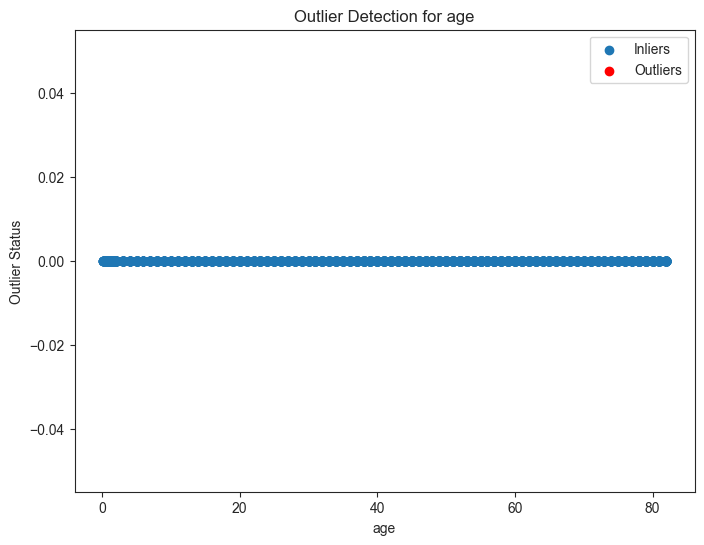

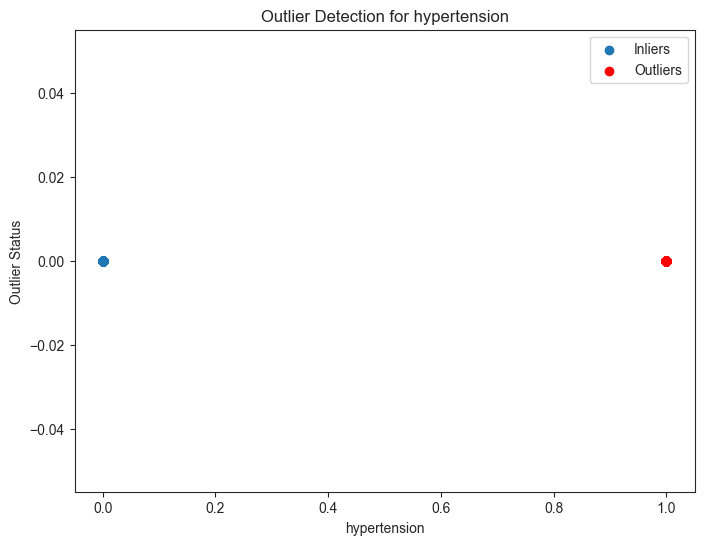

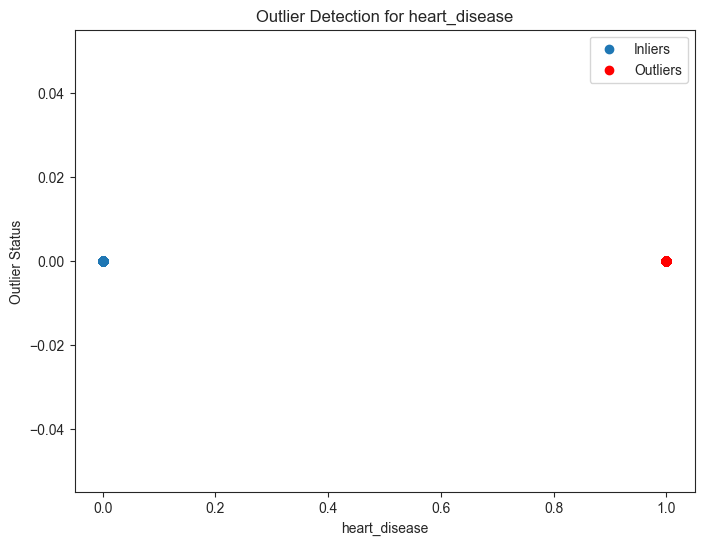

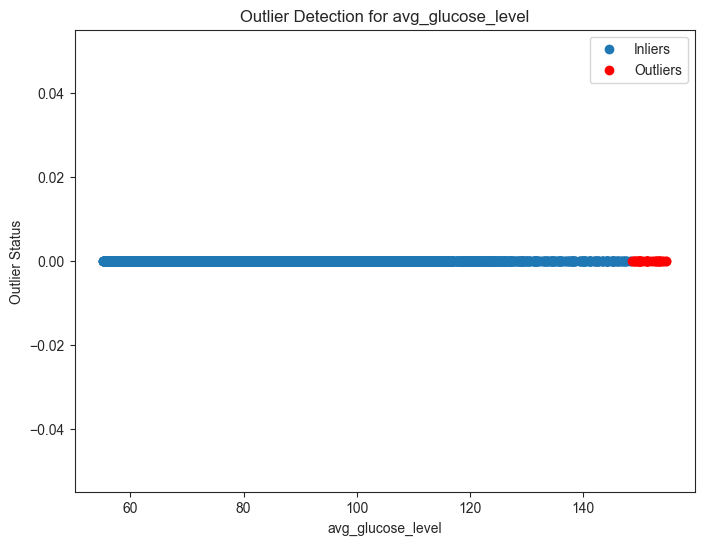

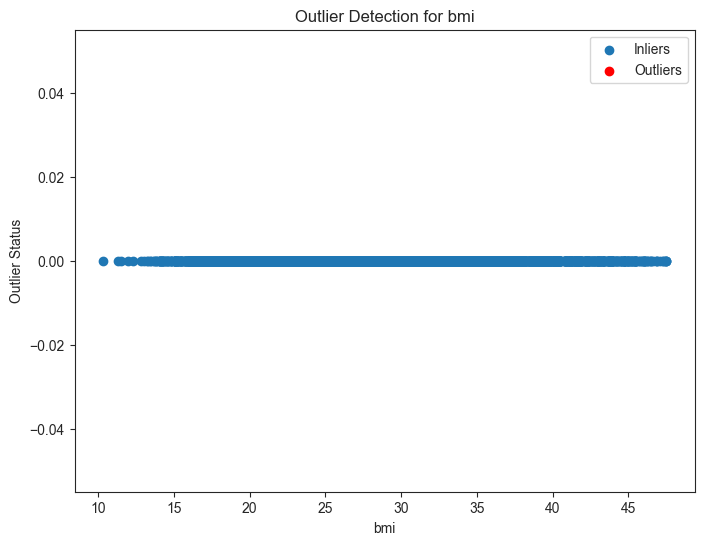

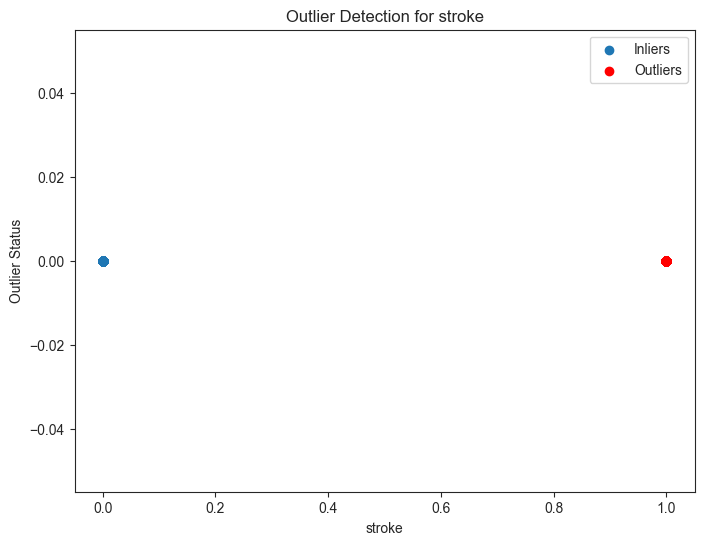

In [31]:
plot_outliers(numeric_features,df)

In [32]:
df[continuous_features].skew(axis=0)

age                 -0.137059
avg_glucose_level    0.745067
bmi                  0.341671
dtype: float64

In [34]:
df[numeric_features].skew()

age                 -0.137059
hypertension         2.715392
heart_disease        3.947244
avg_glucose_level    0.745067
bmi                  0.341671
stroke               4.193284
dtype: float64

In [35]:
df[discrete_features].skew(axis=0)

hypertension     2.715392
heart_disease    3.947244
stroke           4.193284
dtype: float64

In [36]:
import pandas as pd
from scipy.stats import skew

def check_skewness(features, df):
    if isinstance(features, str):
        features = [features]
    
    skewness_results = []
    
    for feature in features:
        # Calculate the skewness
        skewness = skew(df[feature])
        
        # Determine the skewness level and direction
        if skewness > 1:
            skewness_level = 'Highly Right-Skewed'
        elif skewness < -1:
            skewness_level = 'Highly Left-Skewed'
        elif skewness > 0.5:
            skewness_level = 'Moderately Right-Skewed'
        elif skewness < -0.5:
            skewness_level = 'Moderately Left-Skewed'
        else:
            skewness_level = 'Symmetric'
        
        # Store the results
        skewness_results.append({
            'Feature': feature,
            'Skewness': skewness,
            'Skewness Level': skewness_level
        })
    
    # Return the results as a DataFrame
    return pd.DataFrame(skewness_results)

# Example usage:
skewness_df = check_skewness(['age', 'avg_glucose_level', 'bmi'], df)
skewness_df

,Feature,Skewness,Skewness Level
0,age,-0.137019,Symmetric
1,avg_glucose_level,0.744848,Moderately Right-Skewed
2,bmi,0.341570,Symmetric


In [42]:
check_skewness(numeric_features,df)

,Feature,Skewness,Skewness Level
0,age,-0.137019,Symmetric
1,hypertension,2.714595,Highly Right-Skewed
2,heart_disease,3.946085,Highly Right-Skewed
3,avg_glucose_level,0.744848,Moderately Right-Skewed
4,bmi,0.341570,Symmetric
5,stroke,4.192053,Highly Right-Skewed


In [46]:
skewed_features = ["hypertension","heart_disease",'avg_glucose_level']


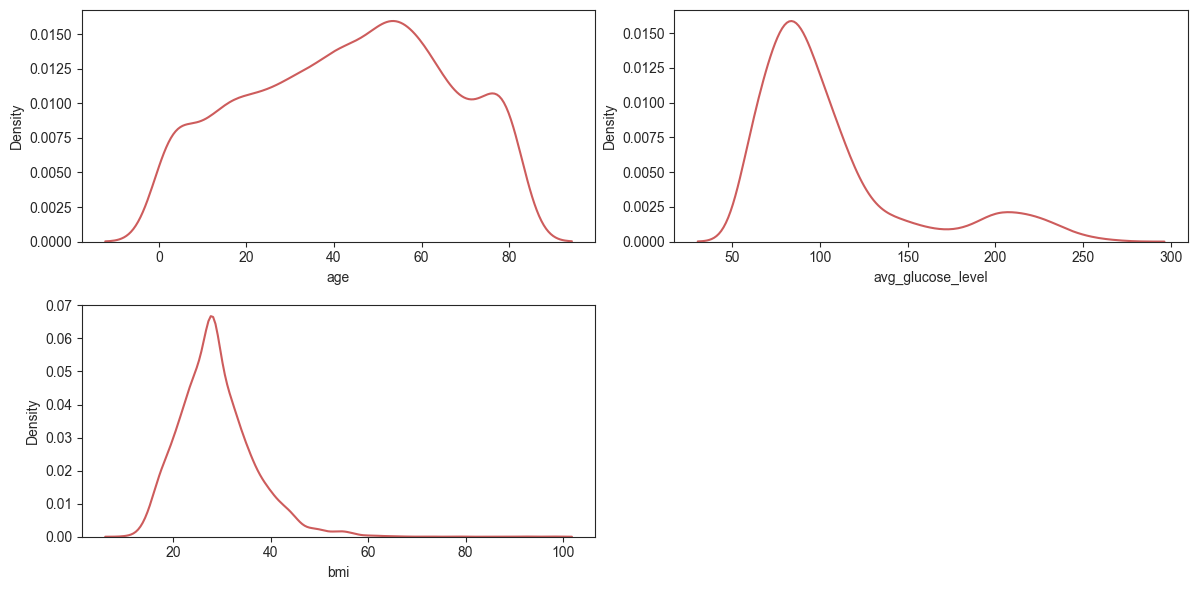

In [43]:
# distribution of data before scaling
plt.figure(figsize=(12, 6))
for i, col in enumerate(continuous_features):
    plt.subplot(2, 2, i+1)
    sns.kdeplot(x=df1[col], color='indianred')
    plt.xlabel(col)
    plt.tight_layout()

Initial skewness for age: -0.1370593225984694
Final skewness for age: -0.31428037768003714


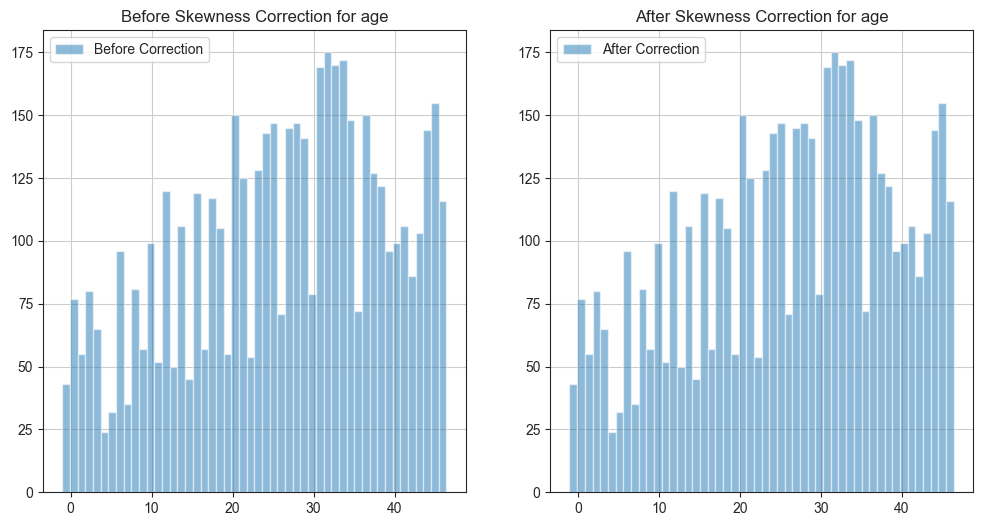

Initial skewness for avg_glucose_level: 0.7450667639361661
Final skewness for avg_glucose_level: 0.002189405017695194


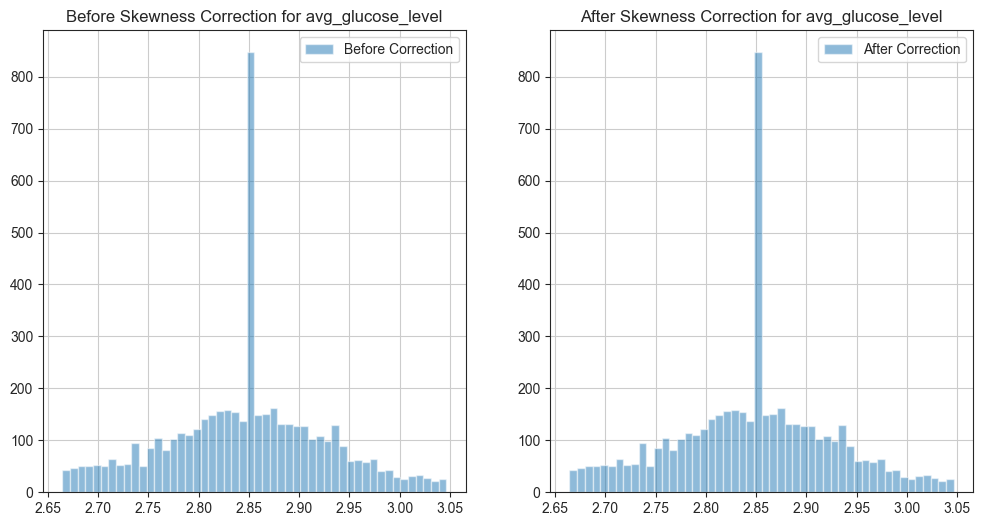

Initial skewness for bmi: 0.34167065841854105
Final skewness for bmi: -0.006649392535414075


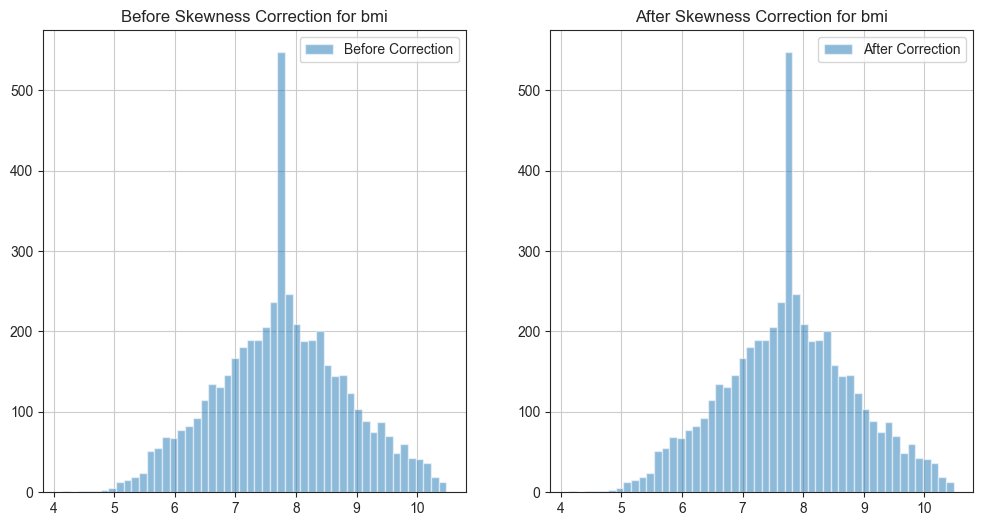

In [45]:
import pandas as pd
import numpy as np
from scipy.stats import boxcox
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import matplotlib.pyplot as plt

def correct_skewness(features, df):
    for feature in features:
        # Check initial skewness
        initial_skewness = df[feature].skew()
        print(f'Initial skewness for {feature}: {initial_skewness}')
        
        # Perform skewness correction using Box-Cox transformation
        df[feature], _ = boxcox(df[feature])
        
        # Check final skewness
        final_skewness = df[feature].skew()
        print(f'Final skewness for {feature}: {final_skewness}')
        
        # Plot histograms to show skewness correction
        plt.figure(figsize=(12, 6))
        plt.subplot(1, 2, 1)
        df[feature].hist(bins=50, alpha=0.5, label='Before Correction')
        plt.title(f'Before Skewness Correction for {feature}')
        plt.legend()
        
        plt.subplot(1, 2, 2)
        df[feature].hist(bins=50, alpha=0.5, label='After Correction')
        plt.title(f'After Skewness Correction for {feature}')
        plt.legend()
        plt.show()

# Example usage:
correct_skewness(['age', 'avg_glucose_level', 'bmi'], df)

In [48]:
df.shape

(5110, 9)

In [49]:
from sklearn.model_selection import train_test_split
x = df.drop(['stroke'], axis=1)
y = df['stroke']

In [50]:
for i in continuous_features:
    print(f'{i}: mean = {df[i].mean():.2f}, median = {df[i].median():.2f}')

age: mean = 26.03, median = 27.63
avg_glucose_level: mean = 2.85, median = 2.85
bmi: mean = 7.76, median = 7.76


* **Mean imputer:** Since we handeled outlier for the continuous features the mean and median of the features are nearly same. When there are no outliers mean performs an a better imputer.
* **Standardscaler:** As the features distribution are nearly normal we use standard scaler.
* **Power Transformer:** Since avg_glucose_level are skewed we use Power Transformer on them


There are no missing values in `age` and `avg_glucose_level` and only `bmi` column should be handled. Based on the above result we can inpute the column with either mean or median. We can go with median imputation since it is robust than mean imputer.

In [ ]:
categorical_features = x.select_dtypes(include="object").columns
num_feature = numeric_features
num_feature.remove("stroke")
transform_features = ['avg_glucose_level']

In [67]:
num_feature

['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi']

In [59]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler, PowerTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

In [61]:
numeric_pipeline = Pipeline(steps = [
    ('imputer',SimpleImputer(strategy = "median")),# or mean
    ('scaler',StandardScaler())
])
categorical_pipeline = Pipeline(steps = [
    ('one_Hot_Encoder',OneHotEncoder()),
    ('scaler',StandardScaler(with_mean = False))
])

transform_pipe = Pipeline(steps = [
    ('transform',PowerTransformer(standardize =True))
])


In [63]:
numeric_pipeline

Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                ('scaler', StandardScaler())])

In [64]:
categorical_pipeline

Pipeline(steps=[('one_Hot_Encoder', OneHotEncoder()),
                ('scaler', StandardScaler(with_mean=False))])

In [66]:
transform_pipe

Pipeline(steps=[('transform', PowerTransformer())])

In [68]:
preprocessor = ColumnTransformer([
    ("Numerical_pipeline",numeric_pipeline,num_feature),
    ("Categorical pipeline",categorical_pipeline,categorical_features),
('Power Transformer',transform_pipe,transform_features)
 ])

In [69]:
X= preprocessor.fit_transform(x)

* Handling Imbalanced Target Variable.
* Synthetic Minority Oversampling Technique or SMOTE is another technique to oversample the minority class. Simply adding duplicate records of minority class often don’t add any new information to the model.

* SMOTE is one of the famous oversampling techniques and is very effective in handling class imbalance. The idea is to combine SMOTE with some undersampling techniques (ENN, Tomek) to increase the effectiveness of handling the imbalanced class.

 **SMOTE+ENN** is one of such a hybrid technique that aims to clean overlapping data points for each of the classes distributed in sample space.
 
This method combines the SMOTE ability to generate synthetic data for minority class and uses ENN to remove overlapping observation of both the classes
 
 - **To add new data of minority class**
 1. Choose random data from the minority class.
 2. Calculate the distance between the random data and its k nearest neighbors.
 3. Multiply the difference with a random number between 0 and 1, then add the result to the minority class as a synthetic sample.
 4. Repeat step number 2–3 until the desired proportion of minority class is met.
 
 - **To remove the data points of both classes**
 1. Determine K, as the number of nearest neighbors. If not determined, then K=3.
 2. Find the K-nearest neighbor of the observation among the other observations in the dataset, then return the majority class from the K-nearest neighbor.
 3. If the class of the observation and the majority class from the observation’s K-nearest neighbor is different, then the observation and its K-nearest neighbor are deleted from the dataset.
 4. Repeat step 2 and 3 until the desired proportion of each class is fulfilled.
 
 - This is method instead of adding duplicate data it synthesises the new data based on the already avalialble classes. Hence we choose this as our imputer method for this problem.

In [71]:
from imblearn.combine import SMOTETomek, SMOTEENN

# Resampling the minority class. The strategy can be changed as required.
smt = SMOTEENN(random_state=42,sampling_strategy='minority' )
# Fit the model to generate the data.
X_res, y_res = smt.fit_resample(X, y)

In [76]:
from sklearn.tree  import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report,ConfusionMatrixDisplay, \
                            precision_score, recall_score, f1_score, roc_auc_score,roc_curve 
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
# from catboost import CatBoostClassifier

In [77]:
def evaluate_clf(true, predicted):
    acc = accuracy_score(true, predicted) # Calculate Accuracy
    f1 = f1_score(true, predicted) # Calculate F1-score
    precision = precision_score(true, predicted) # Calculate Precision
    recall = recall_score(true, predicted)  # Calculate Recall
    roc_auc = roc_auc_score(true, predicted) #Calculate Roc
    return acc, f1 , precision, recall, roc_auc

In [78]:
# Initialize models which are required for models
models = {
    "Random Forest": RandomForestClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Logistic Regression": LogisticRegression(),
     "K-Neighbors Classifier": KNeighborsClassifier(),
    "XGBClassifier": XGBClassifier(), 
    #  "CatBoosting Classifier": CatBoostClassifier(verbose=False),
    "AdaBoost Classifier": AdaBoostClassifier()
}

In [80]:
# Create a function which can evaluate models and return a report 
def evaluate_models(X, y, models):
    '''
    This function takes in X and y and models dictionary as input
    It splits the data into Train Test split
    Iterates through the given model dictionary and evaluates the metrics
    Returns: Dataframe which contains report of all models metrics with cost
    '''
    # separate dataset into train and test
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
    
    models_list = []
    accuracy_list = []
    auc= []
    
    for i in range(len(list(models))):
        model = list(models.values())[i]
        model.fit(X_train, y_train) # Train model

        # Make predictions
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

        # Training set performance
        model_train_accuracy, model_train_f1,model_train_precision, model_train_recall,model_train_rocauc_score=evaluate_clf(y_train ,y_train_pred)


        # Test set performance
        model_test_accuracy,model_test_f1,model_test_precision, model_test_recall,model_test_rocauc_score=evaluate_clf(y_test, y_test_pred)

        print(list(models.keys())[i])
        models_list.append(list(models.keys())[i])

        print('Model performance for Training set')
        print("- Accuracy: {:.4f}".format(model_train_accuracy))
        print('- F1 score: {:.4f}'.format(model_train_f1)) 
        print('- Precision: {:.4f}'.format(model_train_precision))
        print('- Recall: {:.4f}'.format(model_train_recall))
        print('- Roc Auc Score: {:.4f}'.format(model_train_rocauc_score))

        print('----------------------------------')

        print('Model performance for Test set')
        print('- Accuracy: {:.4f}'.format(model_test_accuracy))
        accuracy_list.append(model_test_accuracy)
        print('- F1 score: {:.4f}'.format(model_test_f1))
        print('- Precision: {:.4f}'.format(model_test_precision))
        print('- Recall: {:.4f}'.format(model_test_recall))
        print('- Roc Auc Score: {:.4f}'.format(model_test_rocauc_score))
        auc.append(model_test_rocauc_score)
        print('='*35)
        print('\n')
        
    report=pd.DataFrame(list(zip(models_list, accuracy_list)), columns=['Model Name', 'Accuracy']).sort_values(by=['Accuracy'], ascending=False)
        
    return report

In [82]:
base_report =evaluate_models(X=X_res, y=y_res, models=models)
base_report.sort_values(ascending = False)

Random Forest
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.9774
- F1 score: 0.9783
- Precision: 0.9679
- Recall: 0.9891
- Roc Auc Score: 0.9771


Decision Tree
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.9505
- F1 score: 0.9522
- Precision: 0.9481
- Recall: 0.9562
- Roc Auc Score: 0.9503


Gradient Boosting
Model performance for Training set
- Accuracy: 0.9243
- F1 score: 0.9309
- Precision: 0.9044
- Recall: 0.9590
- Roc Auc Score: 0.9220
----------------------------------
Model performance for Test set
- Accuracy: 0.9091
- F1 score: 0.9145
- Precision: 0.8877
- Recall: 0.9428
- Roc Auc Score: 0.9081


Logistic Regression
Model performance for Training 

,Model Name,Accuracy
0,Random Forest,0.977444
5,XGBClassifier,0.970551
4,K-Neighbors Classifier,0.968672
1,Decision Tree,0.950501
2,Gradient Boosting,0.909148
6,AdaBoost Classifier,0.880952
3,Logistic Regression,0.866541


In [87]:
base_report.sort_values(ascending = False,by = "Accuracy")

,Model Name,Accuracy
0,Random Forest,0.977444
5,XGBClassifier,0.970551
4,K-Neighbors Classifier,0.968672
1,Decision Tree,0.950501
2,Gradient Boosting,0.909148
6,AdaBoost Classifier,0.880952
3,Logistic Regression,0.866541


In [97]:
#Initialize few parameter for Hyperparamter tuning
xgboost_params = {
    "learning_rate": [0.1, 0.01],
    "max_depth": [5, 8, 12, 20, 30],
    "n_estimators": [100, 200, 300],
    "colsample_bylevel": [0.5, 0.8, 1, 0.3, 0.4]
}

cat_params = {
    "learning_rate": [0.1, 0.01],
    "max_depth": [10, 15, 30, 20]
}

rf_params = {
    "max_depth": [10, 12, None, 15],
    "max_features": ['sqrt', 'log2', None],
    "min_samples_split": [100, 150, 200, 300],
    "n_estimators": [10, 50, 100, 200]
}

knn_params = {
    "algorithm": ['auto', 'ball_tree', 'kd_tree','brute'],
    "weights": ['uniform', 'distance'],
    "n_neighbors": [3, 4, 5, 7, 9],
}

gradient_params = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
}

In [98]:
randomcv_models = [
    ('XGBoost', XGBClassifier(), xgboost_params),
    ('Gradient boost', GradientBoostingClassifier(),gradient_params ),
    ("RF", RandomForestClassifier(), rf_params),
    ("KNN", KNeighborsClassifier(), knn_params)
]

In [99]:
from sklearn.model_selection import RandomizedSearchCV

model_param = {}
for name, model, params in randomcv_models:
    random = RandomizedSearchCV(estimator=model,
                                   param_distributions=params,
                                   n_iter=100,
                                   cv=3,
                                   verbose=2,
                                   n_jobs=-1)
    random.fit(X_res, y_res)
    model_param[name] = random.best_params_

for model_name in model_param:
    print(f"---------------- Best Params for {model_name} -------------------")
    print(model_param[model_name])

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Fitting 3 folds for each of 27 candidates, totalling 81 fits
Fitting 3 folds for each of 100 candidates, totalling 300 fits
Fitting 3 folds for each of 40 candidates, totalling 120 fits
---------------- Best Params for XGBoost -------------------
{'n_estimators': 200, 'max_depth': 20, 'learning_rate': 0.1, 'colsample_bylevel': 0.4}
---------------- Best Params for Gradient boost -------------------
{'n_estimators': 200, 'max_depth': 7, 'learning_rate': 0.1}
---------------- Best Params for RF -------------------
{'n_estimators': 100, 'min_samples_split': 100, 'max_features': 'log2', 'max_depth': 15}
---------------- Best Params for KNN -------------------
{'weights': 'distance', 'n_neighbors': 3, 'algorithm': 'auto'}


In [100]:

best_models = {
    "Random Forest Classifier": RandomForestClassifier(**model_param['RF']),
    "KNeighborsClassifier": KNeighborsClassifier(**model_param['KNN']),
    "XGBClassifier": XGBClassifier(**model_param['XGBoost'],n_jobs=-1),
    "GradientBoostingClassifier": GradientBoostingClassifier(**model_param['Gradient boost'])
}
tuned_report =evaluate_models(X=X_res, y=y_res, models=best_models)

Random Forest Classifier
Model performance for Training set
- Accuracy: 0.9198
- F1 score: 0.9271
- Precision: 0.8967
- Recall: 0.9596
- Roc Auc Score: 0.9171
----------------------------------
Model performance for Test set
- Accuracy: 0.9098
- F1 score: 0.9156
- Precision: 0.8835
- Recall: 0.9501
- Roc Auc Score: 0.9085


KNeighborsClassifier
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.9862
- F1 score: 0.9868
- Precision: 0.9751
- Recall: 0.9988
- Roc Auc Score: 0.9858


XGBClassifier
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.9787
- F1 score: 0.9796
- Precision: 0.9668
- Recall: 0.9927
- Roc Auc Score: 0.9783


GradientBoostingClassifier
Model perf

In [101]:
tuned_report

,Model Name,Accuracy
1,KNeighborsClassifier,0.986216
2,XGBClassifier,0.978697
3,GradientBoostingClassifier,0.974311
0,Random Forest Classifier,0.909774


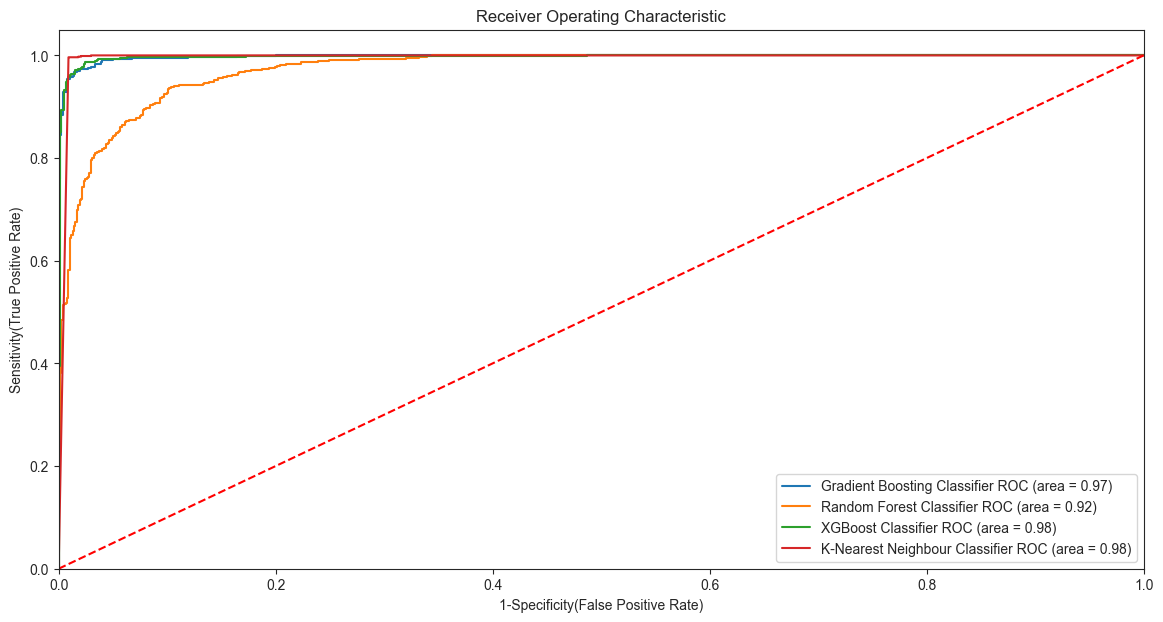

<Figure size 640x480 with 0 Axes>

In [103]:
from sklearn.metrics import roc_auc_score,roc_curve
# Add the models to the list that you want to view on the ROC plot
auc_models = [
    {
        'label': 'Gradient Boosting Classifier',
        "model": GradientBoostingClassifier(**model_param['Gradient boost']),
        'auc': 0.974
    },
{
    'label': 'Random Forest Classifier',
    'model': RandomForestClassifier(**model_param['RF']),
    'auc': 0.9152
},
{
    'label': 'XGBoost Classifier',
    'model': XGBClassifier(**model_param['XGBoost'],n_jobs=-1),
    'auc': 0.9785
},
{
    'label': "K-Nearest Neighbour Classifier",
    'model': KNeighborsClassifier(**model_param['KNN']),
    'auc': 0.9842 
},

]

X_train, X_test, y_train, y_test = train_test_split(X_res,y_res,test_size=0.2,random_state=42)
# create loop through all model
plt.figure(figsize=(14,7))
for algo in auc_models:
    model = algo['model'] # select the model
    model.fit(X_train, y_train) # train the model
# Compute False postive rate, and True positive rate
    fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
# Calculate Area under the curve to display on the plot
    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (algo['label'], algo['auc']))
# Custom settings for the plot
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show() 
plt.savefig(r"./images/auc.png")
  # Display

* Both KNN and XGBoost are preforming at the same accuracy so either one con be used

In [105]:
best_model = XGBClassifier(**model_param['XGBoost'], verbose=False)
best_model = best_model.fit(X_train,y_train)
y_pred = best_model.predict(X_test)
score = accuracy_score(y_test,y_pred)
cr = classification_report(y_test,y_pred)

print("FINAL MODEL 'XGBOOST'")
print ("Accuracy Score value: {:.4f}".format(score))
print (cr)

FINAL MODEL 'XGBOOST'
Accuracy Score value: 0.9787
              precision    recall  f1-score   support

           0       0.99      0.96      0.98       774
           1       0.97      0.99      0.98       822

    accuracy                           0.98      1596
   macro avg       0.98      0.98      0.98      1596
weighted avg       0.98      0.98      0.98      1596



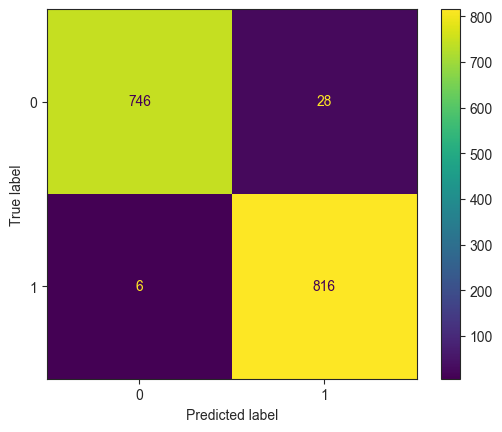

In [106]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(best_model, X_test, y_test)